# Visual Question Answering ML Model on CLEVR dataset


   Visual Question Answering (VQA) is a novel problem domain where multi-modal inputs must be processed in order to solve the task given in the form of a natural language. As the solutions inherently require to combine visual and natural language processing with abstract reasoning, the problem is considered as AI-complete. Recent advances indicate that using high-level, abstract facts extracted from the inputs might facilitate reasoning. Following that direction we decided to develop a solution combining state-of-the-art object detection and reasoning modules. 
   In this article we would like to validate is whether the operation on highlevel and abstract facts extracted from the image might improve the accuracy of the system in a neutural network system. 



# Related work

   Research on VQA has resulted in many interesting solutions. Those, however, could not have been developed without the existence of proper datasets and metrics for evaluation and comparison of the results.
   The efforts in joint embedding focus on the methods for combining multi-modal representations. As in VQA there are two distinct input modalities (image and text),
which makes this problem similar to the problems found in other multi-modal domains. For example the projection of user and item embeddings into the common representation space in neural recommender systems . Exemplary approaches developed for the VQA problem domain include e.g. Multimodal Compact Bilinear pooling (MCB) method that performed joint embedding of visual and text features, or Relational Networks (RN) where embedded question was concatenated with features extracted from pairs of image regions, enabling the system to reason about the relation between objects being present in those regions.
    The architecture and modelling this implementation is represent on the figure 1 . 

<center> Figure 1:  General architecture of the proposed system

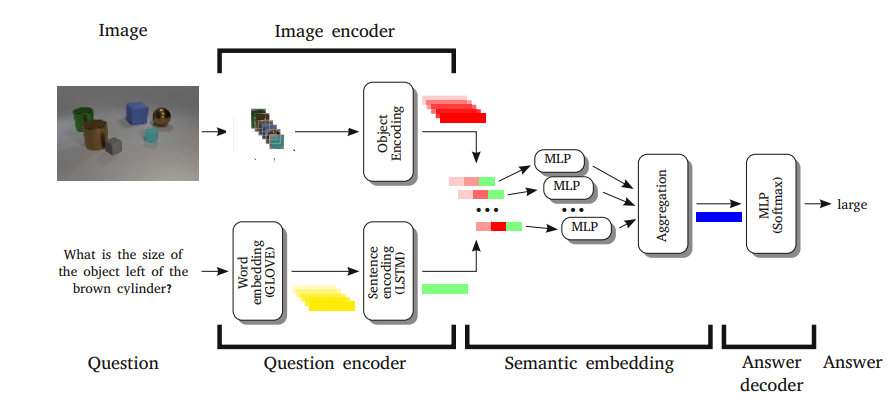

Source : Dased on  DESTA, 2018  

# Solution 

The Architecture that is used on this post are  presented in Fig. 1. It extends the Encoder-Decoder architecture, which originally consisted of two RNNs, the first one used for encoding
a sequence of input symbols into a fixed length representation, and the other for  decoding that representation into another sequence of output symbols.To deployment architecture propose in this architecture we use a tensorflow and panda, that will be describe below . 

In [104]:
#!pip install pandas
#!pip install nltk
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


# Import libraries 
First of all, need to import the components and verify the gpu process.

In [105]:
#importing necessary libraries and frameworks
#!pip install tensorflow_datasets
import numpy as np
import pandas as pd   
import os
from pathlib import Path
import glob
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import nltk
import cv2
import matplotlib.pyplot as plt
import random

#Check GPU is available for training or not Or whether the tensorflow version can utilize gpu 

#print("Number of GPUs :", len(physical_devices)) 
print("Tensorflow GPU :",tf.test.is_built_with_cuda())
print(tf.test.gpu_device_name())
# if len(physical_devices)>0:
#     device="/GPU:0"
# else:
#     device="/CPU:0"

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs :", len(gpu_devices)) 
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)


Tensorflow GPU : True
/device:GPU:0
Number of GPUs : 1


2022-01-11 20:52:16.601657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 20:52:16.602599: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.455GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2022-01-11 20:52:16.602889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 20:52:16.603741: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 20:52:16.604289: I tensorflow/core/common_run

# Loading the data from the JSON files 

Loading the json files using JSON module and using pandas to create a dataframe consisting of the path to the images and respective questions and answers to the images.
To store the information will be load by json files, will be use tow arrays, that will be transform by panda.  

In [106]:
#train_dataframe and val_dataframe stores the path to the images and respective questions and answers
lenghtData = 200
train_data_path='/home/shudip/Downloads/VQA-bangla-dataset/translate_py/clver_bn/clever_bangla_train_12701_v2.json'
tmp_path='/home/shudip/Downloads/CLEVR_v1.0/questions/CLEVR_train_questions.json'
val_path='/home/shudip/Downloads/VQA-bangla-dataset/translate_py/clver_bn/CLEVR_val_bn_1000_v2.json'
trainList=[]
with open(train_data_path,'r',encoding = 'utf-8') as f:
    data = json.load(f)
    for K in range(lenghtData):
        i = data['questions'][random.randrange(20, 5000, 3)]
        temp=[]
        for path in glob.glob('/home/shudip/Downloads/CLEVR_v1.0/images/train/'+i['image_filename']): 
            temp.append(path)
        temp.append(i['question'])
        temp.append(i['answer'])
        trainList.append(temp)
    print(len(trainList))
f.close()
labels=['Path','Question','Answer']
train_dataframe = pd.DataFrame.from_records(trainList, columns=labels)#training Dataframe 
del(data)
del(trainList)

valList=[]
with open(train_data_path,'r',encoding = 'utf-8') as f:
    data = json.load(f)
    print(len(data['questions']))
    for k in range(50):
        i = data['questions'][random.randrange(20, 5000, 3)]
        print(i['image_filename'])
        temp=[]
        for path in glob.glob('/home/shudip/Downloads/CLEVR_v1.0/images/train/'+i['image_filename']):
            print(path)
            temp.append(path)
        temp.append(i['question'])
        temp.append(i['answer'])
        valList.append(temp)
    print(len(valList))
f.close()
val_dataframe = pd.DataFrame.from_records(valList, columns=['Path','Question','Answer'])#validation Dataframe
print(valList)
del(data)
del(valList)
val_dataframe.head()

200
12291
CLEVR_train_000431.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000431.png
CLEVR_train_000449.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000449.png
CLEVR_train_000431.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000431.png
CLEVR_train_000072.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000072.png
CLEVR_train_000195.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000195.png
CLEVR_train_000161.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000161.png
CLEVR_train_000202.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000202.png
CLEVR_train_000213.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000213.png
CLEVR_train_000227.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000227.png
CLEVR_train_000334.png
/home/shudip/Downloads/CLEVR_v1.0/images/train/CLEVR_train_000334.png
CLEVR_train_000359.png
/home/shudip/Downloads/CLEVR_v1.0/ima

,Path,Question,Answer
0,/home/shudip/Downloads/CLEVR_v1.0/images/train...,ছোট্ট সাইয়ান মেটাল অবজেক্টের সামনে এবং বড় হল...,সিলিন্ডার
1,/home/shudip/Downloads/CLEVR_v1.0/images/train...,বড় সিলিন্ডার হিসাবে একই রং আছে এমন একটি ছোট্ট...,না
2,/home/shudip/Downloads/CLEVR_v1.0/images/train...,ছোট্ট সাইয়ান মেটাল অবজেক্টের সামনে এবং বড় হল...,সিলিন্ডার
3,/home/shudip/Downloads/CLEVR_v1.0/images/train...,নীল ম্যাট বস্তু যা সবুজ ধাতু বস্তুর মতো একই আক...,বড়
4,/home/shudip/Downloads/CLEVR_v1.0/images/train...,ধাতু সিলিন্ডার হিসাবে একই রং একটি বড় বস্তু আছে?,না


# Text encoder

The diagram for question processing is shown in Fig. 2. We start with the question and answer consisting of several words:
 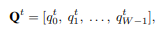

According Hochreiter , where W denotes the number of words constituting a given question and answer that we use  GloVe (Global Vectors for Word Representation) word embedding model to encode question words. Finally, we pass the encoded words one by one as inputs to the LSTM to produce a list of encoded output:
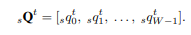


Figure 2 - Dataflow diagram of question encoding
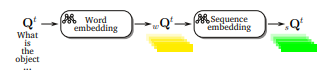
Source : DESTA

In the next cell we prepare a vocabulary set for questions and answers present in the dataset, it will be used to create an encoder, conforme describe above.

In [107]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer()
# index=39
# tokenizer.fit_on_texts(train_dataframe['Answer'][index])
# print(train_dataframe['Answer'][index])
# train_sequences = tokenizer.texts_to_sequences(train_dataframe['Answer'][index])
# print(train_sequences)
help(tfds.deprecated.text.TokenTextEncoder)

Help on class TokenTextEncoder in module tensorflow_datasets.core.deprecated.text.text_encoder:

class TokenTextEncoder(TextEncoder)
 |  TokenTextEncoder(vocab_list, oov_buckets=1, oov_token='UNK', lowercase=False, tokenizer=None, strip_vocab=True, decode_token_separator=' ')
 |  
 |  TextEncoder backed by a list of tokens.
 |  
 |  Tokenization splits on (and drops) non-alphanumeric characters with
 |  regex "\W+".
 |  
 |  Method resolution order:
 |      TokenTextEncoder
 |      TextEncoder
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, vocab_list, oov_buckets=1, oov_token='UNK', lowercase=False, tokenizer=None, strip_vocab=True, decode_token_separator=' ')
 |      Constructs a TokenTextEncoder.
 |      
 |      To load from a file saved with `TokenTextEncoder.save_to_file`, use
 |      `TokenTextEncoder.load_from_file`.
 |      
 |      Args:
 |        vocab_list: `list<str>`, list of tokens.
 |        oov_buckets: `int`, the number of `int`s to rese

In [108]:
vocab_set=set()#set object used to store the vocabulary

tokenizer = tfds.deprecated.text.Tokenizer()
# from transformers import AutoTokenizer, AutoModel
# tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")



for i in val_dataframe['Question']:
    i=i.strip()
    vocab_set.update(i.split(" "))
for i in train_dataframe['Question']:
    i=i.strip()
    vocab_set.update(i.split(" "))
for i in val_dataframe['Answer']:
    i=i.strip()
    vocab_set.update(i.split(" "))
for i in train_dataframe['Answer']:
    i=i.strip()
    vocab_set.update(i.split(" "))
    

# for i in val_dataframe['Question']:
#     print("token",i.split(" "))
#     vocab_set.update(tokenizer.tokenize(i))
# for i in train_dataframe['Question']:
#     vocab_set.update(tokenizer.tokenize(i))
# for i in val_dataframe['Answer']:
#     vocab_set.update(tokenizer.tokenize(i))
# for i in train_dataframe['Answer']:
#     vocab_set.update(tokenizer.tokenize(i))

#Creating an Encoder and a Function to preprocess the text data during the training and inference    
    
encoder=tfds.deprecated.text.TokenTextEncoder(vocab_set)
print(vocab_set)
print(len(vocab_set))
index=39
print("Testing the Encoder with sample questions - \n ")
example_text=encoder.encode(train_dataframe['Question'][index])
example_ans=encoder.encode(train_dataframe['Answer'][index])
print("Original Text = "+train_dataframe['Question'][index])
print("Original ans = "+train_dataframe['Answer'][index])
print(type(example_text))
print(str(example_ans))
print("After Encoding = ",str(example_text))

{'ঘনক্ষেত্র', 'ম্যাট', 'আছে;এটি', 'রয়েছে?', 'ঘনক', 'রয়েছে;এটির', 'বাম', 'আকৃতি?', 'ব্লকটি', 'ধাতু', 'অন্য', 'বস্তু?', 'অধিকার?', 'কত', 'ব্লকগুলির', 'সিলিন্ডারগুলির', 'মত', 'বলের', 'অবস্থিত', 'কোন', 'আকৃতিটি', 'বাকি', 'কি?', 'ডান', 'গোলকটি', 'কী?', 'বেশী', 'উপাদানটি', 'উপাদান?', 'হলুদ', 'কী', 'রকম?', '2.', 'বৃহত', 'বড়', 'ঘনত্ব', 'এবং', 'কিউব', 'বস্তুটি', 'ম্যাটের', 'আছে;বড়', 'দৃশ্যমান', 'একটি', 'তার', 'বৃহৎ', '5.', 'হয়?', 'মেটাল', 'পিছনে', 'কি', '3.', 'আছে', 'রয়েছে', 'বিগ', 'গোলমালের', 'হিসাবে', 'আকৃতির', 'ঘন', 'উপাদান;তার', 'অবস্থিত;সবুজ', 'থাকা', 'মতোই?', 'ক্ষুদ্র', 'ব্লকগুলি', 'সান', 'লাল', 'আছে;নীল', 'হল', 'আরেকটি', 'সাইয়ান', 'বল', 'আছে;রক্তবর্ণ', 'আকার?', 'গোলকের', 'বস্তু', 'রয়েছে।এটা', 'গোলক?', 'আছে;ছোট', 'ব্লকের', 'ডানদিকে', 'রাবার', 'বা', 'দিকে', 'পাশে', 'জিনিস?', 'একই?', 'থাকে?', 'ব্লক', 'কিছু', 'আছে?', 'চকচকে', 'সায়ান', 'আকার', 'চিত্তাকর্ষক', 'সোয়ান', 'অবজেক্টের', 'জিনিসটি', 'রয়েছে;তার', 'বামে', 'ঘনত্বের', 'উপাদান', 'আছে;তার', 'জিনিসটির', 'উভয়', 'গোলের', 'একই', 'কত

In [109]:
max_len=0
for i in val_dataframe['Question']:
    text=encoder.encode(i)
    
    if len(i)>max_len:
        max_len=len(i)
print(max_len)

114


In [110]:
# count=0
# vocab=[]
# for i in vocab_set:
# #     print( i ,encoder.encode(i))
#     if len(encoder.encode(i)) > 1:
#         count+=1
#         vocab.append(i)
# print("before",count)

# for i in vocab:
#     vocab_set.remove(i)

# count=0
# for i in vocab_set:
# #     print( i ,encoder.encode(i))
#     if len(encoder.encode(i)) > 1:
#         count+=1
# print("after",count)

In [111]:
def filter_data(data):
    count=0
    for k,i in enumerate(data['Answer']):
        print(k,i,encoder.encode(i))
        if len(encoder.encode(i))>1:
            count+=1
            data = data.drop(labels=k, axis=0)
    return data

train_dataframe = filter_data(train_dataframe)
val_dataframe = filter_data(val_dataframe)

0 হ্যাঁ [162]
1 হ্যাঁ [162]
2 হ্যাঁ [162]
3 মেটাল [48]
4 হ্যাঁ [162]
5 1. [182]
6 না [175]
7 বড় [35]
8 0. [180]
9 রাবার [81]
10 না [175]
11 না [175]
12 নীল [148]
13 হ্যাঁ [162]
14 রাবার [81]
15 2. [33]
16 হ্যাঁ [162]
17 2. [33]
18 হ্যাঁ [162]
19 না [175]
20 না [175]
21 হ্যাঁ [162]
22 না [175]
23 না [175]
24 ধূসর [114]
25 বড় [35]
26 2. [33]
27 হ্যাঁ [162]
28 বড় [35]
29 হ্যাঁ [162]
30 2. [33]
31 0. [180]
32 না [175]
33 হ্যাঁ [162]
34 2. [33]
35 0. [180]
36 0. [180]
37 হ্যাঁ [162]
38 মেটাল [48]
39 হ্যাঁ [162]
40 সিলিন্ডার [165]
41 হ্যাঁ [162]
42 সাইয়ান [70]
43 না [175]
44 1. [182]
45 হ্যাঁ [162]
46 0. [180]
47 হ্যাঁ [162]
48 না [175]
49 হ্যাঁ [162]
50 না [175]
51 হ্যাঁ [162]
52 নীল [148]
53 হলুদ [30]
54 0. [180]
55 হ্যাঁ [162]
56 হ্যাঁ [162]
57 না [175]
58 0. [180]
59 0. [180]
60 0. [180]
61 0. [180]
62 নীল [148]
63 না [175]
64 0. [180]
65 1. [182]
66 হ্যাঁ [162]
67 হ্যাঁ [162]
68 মেটাল [48]
69 বাদামী [82, 184, 184]
70 হ্যাঁ [162]
71 5. [46]
72 না [175]
73 ছোট [117]
74 1. [182]
75 হ্য

In [112]:
# count=0
# for k,i in enumerate(train_dataframe['Answer']):
#     print(k,i,encoder.encode(i))
#     if len(encoder.encode(i))>1:
#         count+=1
# print(count)

In [113]:
help(tfds.deprecated.text.Tokenizer())

Help on Tokenizer in module tensorflow_datasets.core.deprecated.text.text_encoder object:

class Tokenizer(builtins.object)
 |  Tokenizer(alphanum_only=True, reserved_tokens=None)
 |  
 |  Splits a string into tokens, and joins them back.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, alphanum_only=True, reserved_tokens=None)
 |      Constructs a Tokenizer.
 |      
 |      Note that the Tokenizer is invertible if `alphanum_only=False`.
 |      i.e. `s == t.join(t.tokenize(s))`.
 |      
 |      Args:
 |        alphanum_only: `bool`, if `True`, only parse out alphanumeric tokens
 |          (non-alphanumeric characters are dropped); otherwise, keep all
 |          characters (individual tokens will still be either all alphanumeric or
 |          all non-alphanumeric).
 |        reserved_tokens: `list<str>`, a list of strings that, if any are in `s`,
 |          will be preserved as whole tokens, even if they contain mixed
 |          alphanumeric/non-alphanumeric characters.
 |

# Image recognition with Machine Learning 

In this part of  article I will focus on image processing, specifically how we can convert images from JPEG or PNG files to usable data for our neural networks. The library I will use is TensorFlow 2.0 as it provides a variety of utility functions to obtain image data from files, resize the images, and even transform a large set of images all at once.

If you’ve ever looked at an image file’s properties before, it’ll show the dimensions of the image, i.e. the height and width of the image. The height and width are based on number of pixels. For example, if the dimensions of an image are 400x300 (width x height), then the total number of pixels in the image is 120000.

The function tensorflow.io.read_file takes the file name as its required argument and returns the contents of the file as a tensor with type tensorflow.string. When the input file is an image, the output of tensorflow.io.read_file will be the raw byte data of the image file. Although the raw byte output represents the image's pixel data, it cannot be used directly. Let’s first see the implementation in Python using a image of clever-database.

In [114]:
imgtest = tf.io.read_file(val_dataframe.iloc[0]['Path'])

# What is a pixel exactly?

A pixel is essentially just a point on an image, with a specific shade, color, and/or opacity. We normally represent a pixel as a single integer or multiple integers. Pixels take a specific form based on the interpretation of the image, which is usually one of the following:
Grayscale: Viewing the image as shades of black and white. Each pixel is an integer between 0–255, where 0 is completely black and 255 is completely white.
RGB: The default interpretation for color images. Each pixel is made up of 3 integers between 0–255, where the integers represent the intensity of red, green, and blue, respectively, for the pixel.
RGBA: An extension of RGB with an added alpha field. The alpha field represents the opacity of an image, and in this Lab we’ll represent a pixel’s alpha value as an integer from 0–255 with 0 being fully transparent and 255 being fully opaque.
We can choose to interpret an image however we want, but there is usually one interpretation that is optimal. For example, we could interpret a black and white image with RGB pixel values, but it is more efficient to view it as a grayscale image (3x fewer integers used). On the other hand, it would be unwise to interpret a colored image using grayscale pixels, since the pixels won’t be able to capture any of the actual colors.

# **Image Type**

Now that have learn how to load an image, it is time to decode the image data into pixel data using TensorFlow.
The decoding function that we use depends on the format of the image. For generic decoding (i.e. decoding any image format), we use tensorflow.image.decode_image but if the input is a JPEG image we use tensorflow.image.decode_jpeg.
Another reason is that tensorflow.image.decode_image supports GIF decoding, which results in an output shape of (num_frames, height, width, channels. Since the function can return data with different shapes, we can't use tensorflow.image.decode_image when we also need to resize the image with tensorflow.image.resize_images.
We can change the pixel format of the decoded image via the channels keyword argument. The channels argument represents the number of integers per pixel. The default value for channels is 0, which means the decoding function uses the interpretation specified from the raw data. Setting channels to 1 specifies a grayscale image, while setting channels to 3 specifies an RGB image. For PNG images we're also allowed to set channels to 4, corresponding to RGBA images. Setting channels to 2 is invalid.

In [115]:
    IMG_SIZE=(200,200)
    imgtest=tf.image.decode_jpeg(imgtest,channels=3) # how many colors have in chanel
    imgtest=tf.image.resize(imgtest,IMG_SIZE)
    

# **Normalization image in Python**
Normalization refers to rescaling real-valued numeric attributes into a 00 to 1 range.

Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model. 
 
In the images RGB , have a pixel is made up of 3 integers between 0–255,to normalizate the values of image , i will share the matriz witt 255 .



In [116]:
 imgtest=tf.math.divide(imgtest, 255)#

# Tensorlfow’s Neural Network Convolution

Training Convolutional Neural Networks means that your network is composed of two separate parts most of the times. The last part of your network, which often contains densely-connected layers but doesn’t have to, generates a classification or regresses a value based on the inputs received by the first Dense layer. 

The first part, however, serves as a “feature extraction” mechanism – it transforms the original inputs into “bits of information” which ensures that the Dense layers perform better. By consequence, the system as a whole allows you to feed it raw inputs, which are processed internally, while you get a probability distribution over a set of classes in return.

Typically, Convolutional layers are used as feature extractors. Through optimization, these layers learn “kernels” which slide (or convolve) over the input data, generating a number of “feature maps” that can subsequently be used for detecting certain patterns in the data. This is achieved by element-wise multiplications between the slice of input data the filter is currently hovering over, and the weights present within the filter.

This, in return, effectively means that a spatial hierarchy is created: the more one moves towards the right when inspecting the model architecture, the smaller the inputs and hence feature maps become. Sometimes, though, you don’t want your input to become smaller – in the case of an autoencoder, for example, where you just want to converge the feature maps into one Sigmoid activated output. This can be achieved with the “padding mechanism”, which is precisely what we’ll cover in this problem. 




# Activation function 

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. A standard integrated circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input. 



# What is padding and why do we need it?

Let’s first take a look at what padding is. From this, it gets clear straight away why we might need it for training our neural network. More specifically, our ConvNet, because that’s where you’ll apply padding pretty much all of time time.

Now, in order to find out about how padding works, we need to study the internals of a convolutional layer first. Here you’ve got one, although it’s very generic:
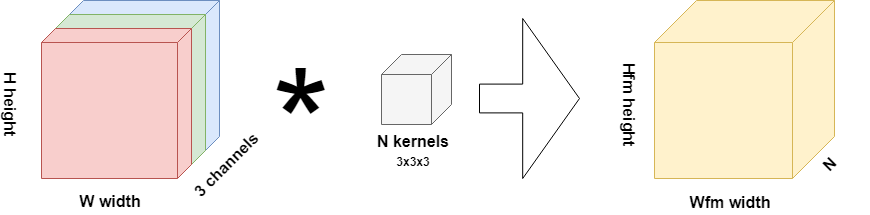


What you see on the left is an RGB input image – **width W**, **height H** and **three channels**. Hence, this layer is likely the first layer in your model; in any other scenario, you’d have feature maps as the input to your layer.

Now, what is a feature map? That’s the yellow block in the image. It’s a collection of N one-dimensional “maps” that each represent a particular “feature” that the model has spotted within the image. This is why convolutional layers are known as feature extractors.

Now, this is very nice – but how do we get from input (whether image or feature map) to a feature map? This is through kernels, or filters, actually. These filters – you configure some number N per convolutional layer – “slide” (strictly: convolve) over your input data, and have the same number of “channel” dimensions as your input data, but have much smaller widths and heights. For example, for the scenario above, a filter may be 3 x 3 pixels wide and high, but always has 3 channels as our input has 3 channels too.

Now, when they slide over the input – from left to right horizontally, then moving down vertically after a row has been fully captured – they perform element-wise multiplications between what’s “currently under investigation” within the input data and the weights present within the filter. These weights are equal to the weights of a “classic” neural network, but are structured in a different way. Hence, optimization a ConvNet involves computing a loss value for the model and subsequently using an optimizer to change the weights.

Through these weights, as you may guess, the model learns to detect the presence of particular features – which, once again, are represented by the feature maps. This closes the circle with respect to how a convolutional layer works.






# Conv layers might induce spatial hierarchy


If the width and/or height of your kernels is >1, you’ll see that the width and height of the feature map being output gets smaller. This occurs due to the fact that the feature map slides over the input and computes the element-wise multiplications, but is too large in order to inspect the “edges” of the input. This is illustrated in the image 2 , where the “red” position is impossible to take and the “green” one is part of the path of the convolution operation.

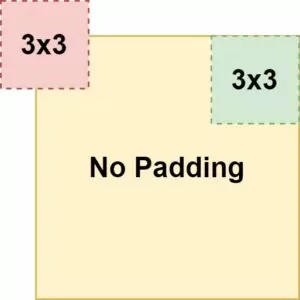
image -2 

As it cannot capture the edges, it won’t be able to effectively “end” at the final position of your row, resulting in a smaller output width and/or height.

We call this a spatial hierarchy. Indeed, convolutional layers may cause a “hierarchy”-like flow of data through the model. In the image 3, you have a schematic representation of a substantial hierarchy and a less substantial one – which is often considered to be less efficient:


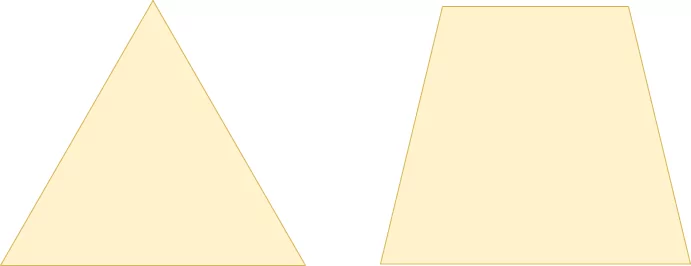 
image -3

# Padding avoids the loss of spatial dimensions


Sometimes, however, you need to apply filters of a fixed size, but you don’t want to lose width and/or height dimensions in your feature maps. For example, this is the case when you’re training an autoencoder. You need the output images to be of the same size as the input, yet need an activation function like e.g. Sigmoid in order to generate them.

If you would do so
with a Conv layer, this would become problematic, as you’d reduce the size of your feature maps – and hence would produce outputs unequal in size to your inputs.

That’s not what we want when we create an autoencoder. We want the original output and the original output only.

Padding helps you solve this problem. Applying it effectively adds “space” around your input data or your feature map – or, more precisely, “extra rows and columns” [with some instantiation] (Chollet, 2017).

Adding the “extra space” now allows us to capture the position we previously couldn’t capture, and allows us to detect features in the “edges” of your input, this desmontrated on the image-4.

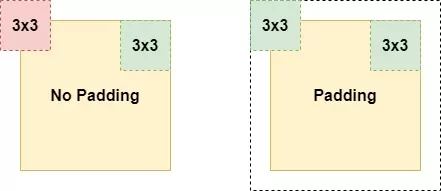
image-4

# Types of padding

This operation pads a tensor according to the paddings you specify. paddings is an integer tensor with shape [n, 2], where n is the rank of tensor. For each dimension D of input, paddings[D, 0] indicates how many values to add before the contents of tensor in that dimension, and paddings[D, 1] indicates how many values to add after the contents of tensor in that dimension. The main models implemented in the tensorflow will be described below. 

# Constant padding

A type of padding that really resembles same padding is constant padding. Here, the outcome can be the same – the output will have the same shape as the input. However, rather than “zeros” – which is what same padding does – constant padding allows you to pad with a user-specified constant value, that will be described in the image 5 and in the code -1 the implemention with tensorflow

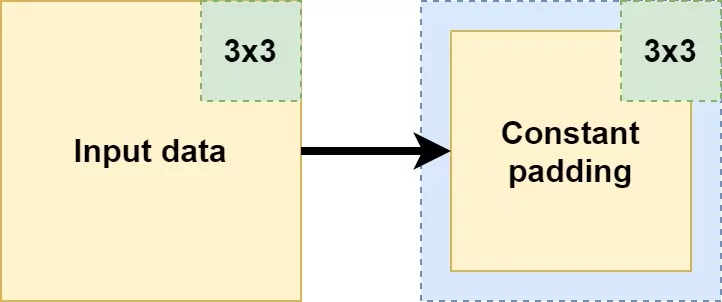
image-5



In [117]:
testConstant = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[1, 1,], [2, 2]])
tf.pad(testConstant, paddings, "CONSTANT")  # [[0, 0, 0, 0, 0, 0, 0],
                                 #  [0, 0, 1, 2, 3, 0, 0],
                                 #  [0, 0, 4, 5, 6, 0, 0],
                                 #  [0, 0, 0, 0, 0, 0, 0]]

<tf.Tensor: shape=(4, 7), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)>

In the image 6, have the exemple in the transformation of image. 

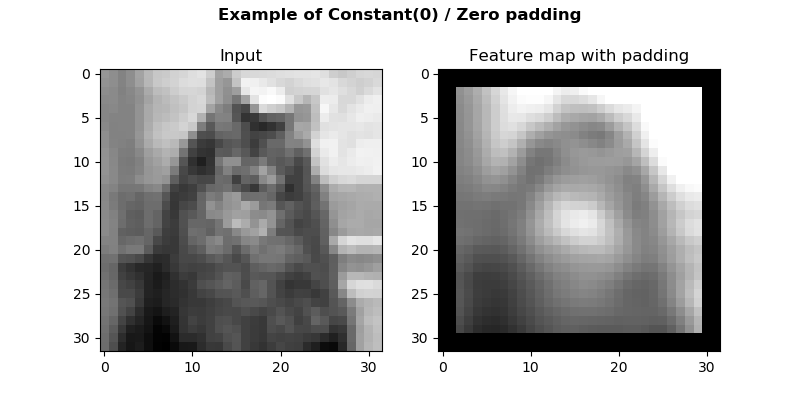
image 6

# Reflective padding

Reflective padding seems to improve the empirical performance of your model . Possibly, this occurs because of how “zero” based padding (i.e., the “same” padding) and “constant” based padding alter the distribution of your dataset. Below you have the implemation, of this feature.

In [118]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[1, 1,], [2, 2]])
tf.pad(t, paddings, "REFLECT")  # [[6, 5, 4, 5, 6, 5, 4],
                                #  [3, 2, 1, 2, 3, 2, 1],
                                #  [6, 5, 4, 5, 6, 5, 4],
                                #  [3, 2, 1, 2, 3, 2, 1]]


<tf.Tensor: shape=(4, 7), dtype=int32, numpy=
array([[6, 5, 4, 5, 6, 5, 4],
       [3, 2, 1, 2, 3, 2, 1],
       [6, 5, 4, 5, 6, 5, 4],
       [3, 2, 1, 2, 3, 2, 1]], dtype=int32)>

In the image 7, you have the example of reflection padding on a image. 

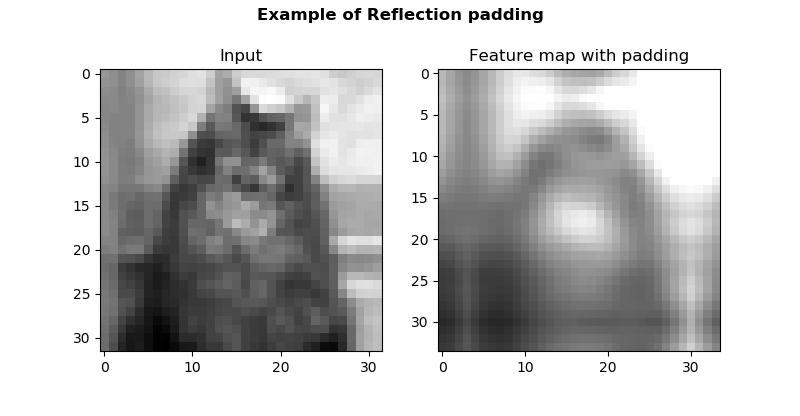
image 7

# Replication padding / symmetric padding 

Replication padding looks like reflection padding, but  you simply take a copy, and mirror it. Like this:

* You’re at the first row again, at the right. You find a 1. What is the next value?
* Simple: you copy the entire row, mirror it, and start adding it as padding values horizontally. So, for row 1 with [3,5,1], this will be [1,5,3] being added. As you can see, since we only pad 2 elements in width, there are 1 and 5, but 3 falls off the padding.

In the image 8 you have a example with images and below you have the code to implemation. 

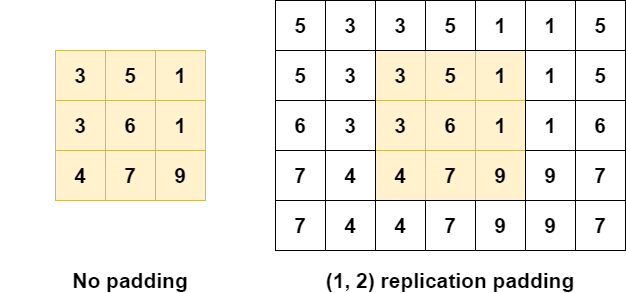

Image 8


In [119]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[1, 1,], [2, 2]])
tf.pad(t, paddings, "SYMMETRIC")  # [[2, 1, 1, 2, 3, 3, 2],
                                  #  [2, 1, 1, 2, 3, 3, 2],
                                  #  [5, 4, 4, 5, 6, 6, 5],
                                  #  [5, 4, 4, 5, 6, 6, 5]]

<tf.Tensor: shape=(4, 7), dtype=int32, numpy=
array([[2, 1, 1, 2, 3, 3, 2],
       [2, 1, 1, 2, 3, 3, 2],
       [5, 4, 4, 5, 6, 6, 5],
       [5, 4, 4, 5, 6, 6, 5]], dtype=int32)>

# **Feature Map**

Consider a image 5 x 5 whose image pixel values are 0, 1 and filter matrix 3 x 3 as shown in the image 9 . 

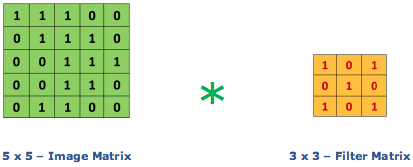
Image 9

Then the convolution of 5 x 5 image matrix multiplies with 3 x 3 filter matrix which is called “Feature Map”, that represent in image 10. 

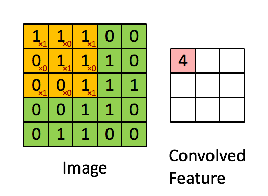

Image 10


Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters. The below example shows various convolution image after applying different types of filters (Kernels).

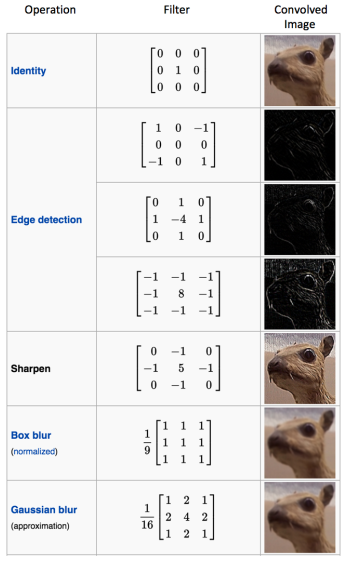
Image 11

# Strides

Stride is a component of convolutional neural networks, or neural networks tuned for the compression of images and video data. Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit,  at a time. The size of the filter affects the encoded output volume, so stride is often set to a whole integer, rather than a fraction or decimal.
**
How does Stride work?**

Imagine a convolutional neural network is taking an image and analyzing the content. If the filter size is 3x3 pixels, the contained nine pixels will be converted down to 1 pixel in the output layer. Naturally, as the stride, or movement, is increased, the resulting output will be smaller. Stride is a parameter that works in conjunction with padding, the feature that adds blank, or empty pixels to the frame of the image to allow for a minimized reduction of size in the output layer. Roughly, it is a way of increasing the size of an image, to counteract the fact that stride reduces the size. Padding and stride are the foundational parameters of any convolutional neural network. 

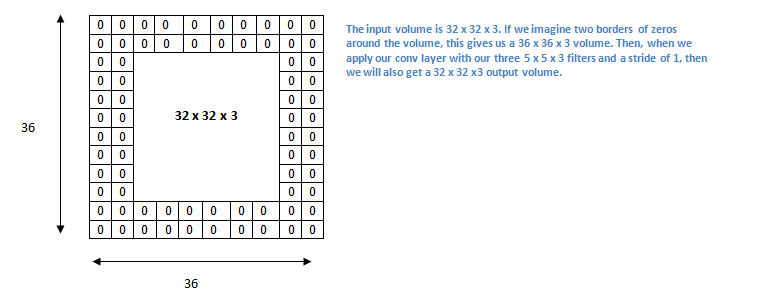
image 12

# Data Set tensorflow
from_tensors combines the input and returns a dataset with a single element, that will be implement  below 

In [120]:
t = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensors(t)   # [[1, 2], [3, 4]]

from_tensor_slices creates a dataset with a separate element for each row of the input tensor, that will be implement below

In [121]:
t = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensor_slices(t)   # [1, 2], [3, 4]

# Convolutional neural network architecture

A Convolutional Neural Network (CNN) is a deep learning algorithm that can recognize and classify features in images for computer vision. It is a multi-layer neural network designed to analyze visual inputs and perform tasks such as image classification, segmentThere are two main parts to a CNN:

A convolution tool that splits the various features of the image for analysis
A fully connected layer that uses the output of the convolution layer to predict the best description for the image action and object detection, which can be useful for autonomous vehicles. 

There are two main parts to a CNN:

* A convolution tool that splits the various features of the image for analysis

* A fully connected layer that uses the output of the convolution layer to predict the best description for the image 

**Basic Convolutional Neural Network Architecture**

CNN architecture is inspired by the organization and functionality of the visual cortex and designed to mimic the connectivity pattern of neurons within the human brain.

The neurons within a CNN are split into a three-dimensional structure, with each set of neurons analyzing a small region or feature of the image. In other words, each group of neurons specializes in identifying one part of the image. CNNs use the predictions from the layers to produce a final output that presents a vector of probability scores to represent the likelihood that a specific feature belongs to a certain class.

**How a Convolutional Neural Network Works━The CNN layers**

A CNN is composed of several kinds of layers:

Convolutional layer━creates a feature map to predict the class probabilities for each feature by applying a filter that scans the whole image, few pixels at a time.

* **Pooling layer (downsampling)**: scales down the amount of information the convolutional layer generated for each feature and maintains the most essential information (the process of the convolutional and pooling layers usually repeats several times).
* **Fully connected input layer**: “flattens” the outputs generated by previous layers to turn them into a single vector that can be used as an input for the next layer.
* **Fully connected layer—applies**: weights over the input generated by the feature analysis to predict an accurate label.
* **Fully connected output layer** : generates the final probabilities to determine a class for the image.

The image 8 ilustrate the process. 

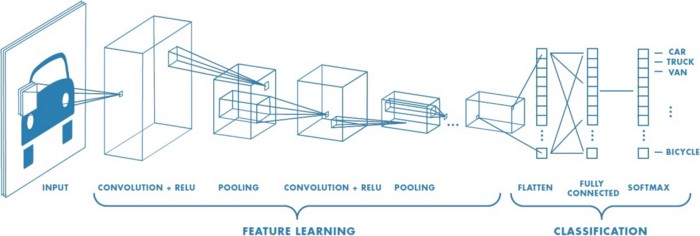
 image 8


# Architecture  mobilenet_v2

MobileNetV2 is a general architecture and can be used for multiple use cases. Depending on the use case, it can use different input layer size and different width factors. This allows different width models to reduce the number of multiply-adds and thereby reduce inference cost on mobile devices.

The principal archicture of mobilenetve is the Convolutional Neural Network (CNN) architecture is inspired by the organization and functionality of the visual cortex and designed to mimic the connectivity pattern of neurons within the human brain.

There are two main parts to a CNN:

  -> A convolution tool that splits the various features of the image for analysis
  -> A fully connected layer that uses the output of the convolution layer to predict the best description for the image.

**How a Convolutional Neural Network Works━The CNN layers**

A CNN is composed of several kinds of layers:

Convolutional layer: creates a feature map to predict the class probabilities for each feature by applying a filter that scans the whole image, few pixels at a time.
Pooling layer (downsampling)━scales down the amount of information the convolutional layer generated for each feature and maintains the most essential information (the process of the convolutional and pooling layers usually repeats several times).
Fully connected input layer: “flattens” the outputs generated by previous layers to turn them into a single vector that can be used as an input for the next layer.
Fully connected layer:applies weights over the input generated by the feature analysis to predict an accurate label.
Fully connected output layer :generates the final probabilities to determine a class for the image.

The neurons within a CNN are split into a three-dimensional structure, with each set of neurons analyzing a small region or feature of the image. In other words, each group of neurons specializes in identifying one part of the image. CNNs use the predictions from the layers to produce a final output that presents a vector of probability scores to represent the likelihood that a specific feature belongs to a certain class.




The architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers described in the Table 2. We use ReLU6 as the non-linearity because of its robustness when used with low-precision computation. We always use kernel size 3 × 3 as is standard
for modern networks, and utilize dropout and batch normalization during training.




MobileNetV2 is very similar to the original MobileNet, except that it uses inverted residual blocks with bottlenecking features. It has a drastically lower parameter count than the original MobileNet. MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.




The parameters will be list below 

**input_shape**	Optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with channels_first data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value. Default to None. input_shape will be ignored if the input_tensor is provided.

**alpha**  Controls the width of the network. This is known as the width multiplier in the MobileNet paper. - If alpha < 1.0, proportionally decreases the number of filters in each layer. - If alpha > 1.0, proportionally increases the number of filters in each layer. - If alpha = 1, default number of filters from the paper are used at each layer. Default to 1.0.



The number of parameters and number of multiply-adds can be modified by using the alpha parameter, which increases/decreases the number of filters in each layer. By altering the image size and alpha parameter, all 22 models from the paper can be built, with ImageNet weights provided.


In [122]:
# gpu_devices = tf.config.experimental.list_physical_devices('GPU')
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)

In [123]:
import numpy as np
exarr = [45,98,55]
# print(np.sum(exarr,axis=0))
# print(np.array([np.sum(exarr,axis=0)]))
np.compress([(len(exarr) > 2)], exarr, axis=0)

array([45])

In [124]:
BATCH_SIZE=1
IMG_SIZE=(200,200)


#Function that uses the encoder created to encode the input question and answer string
def encode_fn(text):
#     print("np",np.array(encoder.encode(text.numpy())))
    return np.array(encoder.encode(text.numpy()))

# def encode_fn_ans(text):
#     arr=np.array(encoder.encode(text.numpy()))
# #     print("arr",arr)
#     if len(arr)>1:
#         encoded_ans=(np.sum(arr)+len(arr))/len(arr)
# #         print("encoded_ans" ,encoded_ans)
#         return np.array([encoded_ans])
#     else:
#         return arr


#Function to load and decode the image from the file paths in the dataframe and use the encoder function
def preprocess(ip,ans):
    img,ques=ip#ip is a list containing image paths and questions
    img=tf.io.read_file(img)
    img=tf.image.decode_jpeg(img,channels=3)
    # quantos canais de cores tem 
    img=tf.image.resize(img,IMG_SIZE)
    img=tf.math.divide(img, 255) 
#     print("image_shape",img.shape)
    
    #The question string is converted to encoded list with fixed size of 50 with padding with 0 value
    ques=tf.py_function(encode_fn,inp=[ques],Tout=tf.int32)
   
    print("shape",ques.get_shape())
    paddings = [[0, 150-tf.shape(ques)[0]]]
#     print(paddings)
    
    ques = tf.pad(ques, paddings, 'CONSTANT', constant_values=0)
#     print("q",ques)
    
    ques.set_shape([150])#Explicit shape must be defined in order to create the Input pipeline
#     print(ques.shape)
    #The Answer is also encoded 
    
    ans=tf.py_function(encode_fn,inp=[ans],Tout=tf.int32)
#     paddings = [[0, len(vocab_set)+10-tf.shape(ans)[0]]]
   
    ans.set_shape([1])
   
    return (img,ques),ans
    
def create_pipeline(dataframe):
    raw_df=tf.data.Dataset.from_tensor_slices(((dataframe['Path'],dataframe['Question']),dataframe['Answer']))
    df=raw_df.map(preprocess)#Preprocessing function is applied to the dataset
    df=df.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)#The dataset is batched
    return df

#The training and validation Dataset objects are created
train_dataset=create_pipeline(train_dataframe)
validation_dataset=create_pipeline(val_dataframe)

# print(train_dataset)
# print(len(train_dataframe))
# print(len(val_dataframe))
# print(train_dataframe.head())
# print(val_dataframe.head())

shape <unknown>
shape <unknown>


In [125]:
dir(train_dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_map_r

# Creating the Model

In [126]:
#Creating the CNN model for image processing


CNN_Input=tf.keras.layers.Input(shape=(200,200,3),name='image_input')

mobilenetv2=tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(200,200,3), alpha=1.0, include_top=False,
                                                      weights='imagenet', input_tensor=CNN_Input)

CNN_model=tf.keras.models.Sequential()
CNN_model.add(CNN_Input)
CNN_model.add(mobilenetv2)
CNN_model.add(tf.keras.layers.GlobalAveragePooling2D())



#Creating the RNN model for text processing
RNN_model=tf.keras.models.Sequential()

RNN_Input=tf.keras.layers.Input(shape=(150),name='text_input')
RNN_model.add(RNN_Input)
RNN_model.add(tf.keras.layers.Embedding(len(vocab_set)+10,256))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,stateful=False,return_sequences=True,recurrent_initializer='glorot_uniform')))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,stateful=False,return_sequences=True,recurrent_initializer='glorot_uniform')))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512,stateful=False,return_sequences=False,recurrent_initializer='glorot_uniform')))


concat=tf.keras.layers.concatenate([CNN_model.output,RNN_model.output])

dense_out=tf.keras.layers.Dense(len(vocab_set)+10,activation='softmax',name='output')(concat)

model = tf.keras.Model(inputs=[CNN_Input,RNN_Input],
                    outputs=dense_out)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
# model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),
#                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model.summary()
print(len(vocab_set))

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 150, 256)     49408       text_input[0][0]                 
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 150, 512)     1050624     embedding_4[0][0]                
____________________________________________________________________________________________

# Training the model on the prepared data

In [133]:
def scheduler(epoch):
  if epoch < 1:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (1 - epoch))

LRS = tf.keras.callbacks.LearningRateScheduler(scheduler)
csv_callback=tf.keras.callbacks.CSVLogger(
    "Training bn Parameters.csv", separator=',', append=False
)
teste =1

#create a checkpoint to save the training

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_bn_2/cp-{epoch:04d}.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)
epoch = 0

epoch = 0


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath='bn_v2_weights.{epoch:02d}.ckpt', 
    verbose=1, 
    save_weights_only=True,
    save_freq=3960*BATCH_SIZE)



#def FormatarEndereco(epoch):
#    epoch = epoch+1
#    return "training_2/cp-"+ str(epoch) + ".ckpt"

#model.save_weights(FormatarEndereco(epoch))

model.save_weights(checkpoint_path.format(epoch=0,val_loss=0))

print(train_dataset)
print(validation_dataset)

with tf.device('/device:GPU:0'):
   history =  model.fit(train_dataset,
              validation_data=validation_dataset,
              callbacks=[csv_callback,LRS,cp_callback],
              epochs=20)

<PrefetchDataset shapes: (((None, 200, 200, 3), (None, 150)), (None, 1)), types: ((tf.float32, tf.int32), tf.int32)>
<PrefetchDataset shapes: (((None, 200, 200, 3), (None, 150)), (None, 1)), types: ((tf.float32, tf.int32), tf.int32)>
Epoch 1/20
198/198 [==============================] - 25s 126ms/step - loss: 2.4373 - sparse_categorical_accuracy: 0.2071 - val_loss: 2.5511 - val_sparse_categorical_accuracy: 0.2200
Epoch 2/20
198/198 [==============================] - 25s 126ms/step - loss: 2.4232 - sparse_categorical_accuracy: 0.2020 - val_loss: 2.5957 - val_sparse_categorical_accuracy: 0.1800
Epoch 3/20
198/198 [==============================] - 25s 127ms/step - loss: 2.4148 - sparse_categorical_accuracy: 0.2576 - val_loss: 2.7146 - val_sparse_categorical_accuracy: 0.1600
Epoch 4/20
198/198 [==============================] - 25s 126ms/step - loss: 2.3875 - sparse_categorical_accuracy: 0.2677 - val_loss: 2.7154 - val_sparse_categorical_accuracy: 0.1400
Epoch 5/20
198/198 [==============

In [ ]:
help(model.fit)

In [ ]:
train_dataframe.iloc[index]['Path']
im=cv2.imread(train_dataframe.iloc[index]['Path'])
plt.imshow(im)

In [ ]:
# !sudo apt-get install libfreetype6-dev libharfbuzz-dev libfribidi-dev gtk-doc-tools
# !wget -O raqm-0.7.0.tar.gz https://raw.githubusercontent.com/python-pillow/pillow-depends/master/raqm-0.7.0.tar.gz

# !tar -xzvf raqm-0.7.0.tar.gz
# !cd raqm-0.7.0
# !./configure --prefix=/usr && make -j4 && sudo make -j4 install

# !python3 -m pip install --upgrade pip
# !python3 -m pip install --upgrade Pillow

Predictions Are as follows = 
(200, 200, 3)
(150,)
ব্লক হিসাবে একই রং যে কোন অন্যান্য জিনিস আছে?
(200, 200, 3)
(150,)
ধূসর ম্যাট বস্তুর আকার সাইয়ান ঘনক্ষেত্রের
 মতো?
(200, 200, 3)
(150,)
নীল চকচকে বস্তুর মতো একই আকারের অন্য কিছু
 আছে কি?
(200, 200, 3)
(150,)
কি উপাদান কি বড় সিলিন্ডার যা চকচকে গোলক হিসাবে
 একই রঙ?
(200, 200, 3)
(150,)
বড় চকচকে সিলিন্ডারের সামনে একটি বড় ম্যাট
 জিনিস আছে;তার আকৃতি ছোট রাবার বস্তুর মত
 একই?
(200, 200, 3)
(150,)
লাল জিনিস হিসাবে একই আকৃতি কত অন্যান্য ম্যাট
 জিনিস?
(200, 200, 3)
(150,)
ছোট্ট সোয়ান রাবার বস্তুর সংখ্যা যা বেগুনি
 ধাতু ব্লকের চেয়ে বড় বেগুনি ম্যাট গোলমালের
 চেয়ে বেশি?
(200, 200, 3)
(150,)
ক্ষুদ্র লাল বল হিসাবে একই উপাদান তৈরি করা
 একটি লাল বস্তু রয়েছে;এটা কি আকার?
(200, 200, 3)
(150,)
কত বড় সিলিন্ডার বড় সাইয়ান ঘনক্ষেত্রের মতো
 একই উপাদান তৈরি করা হয়?
(200, 200, 3)
(150,)
ক্ষুদ্র সবুজ ধাতু বস্তুর মতো একই আকৃতি যা
 কি উপাদানটি বড় জিনিস?


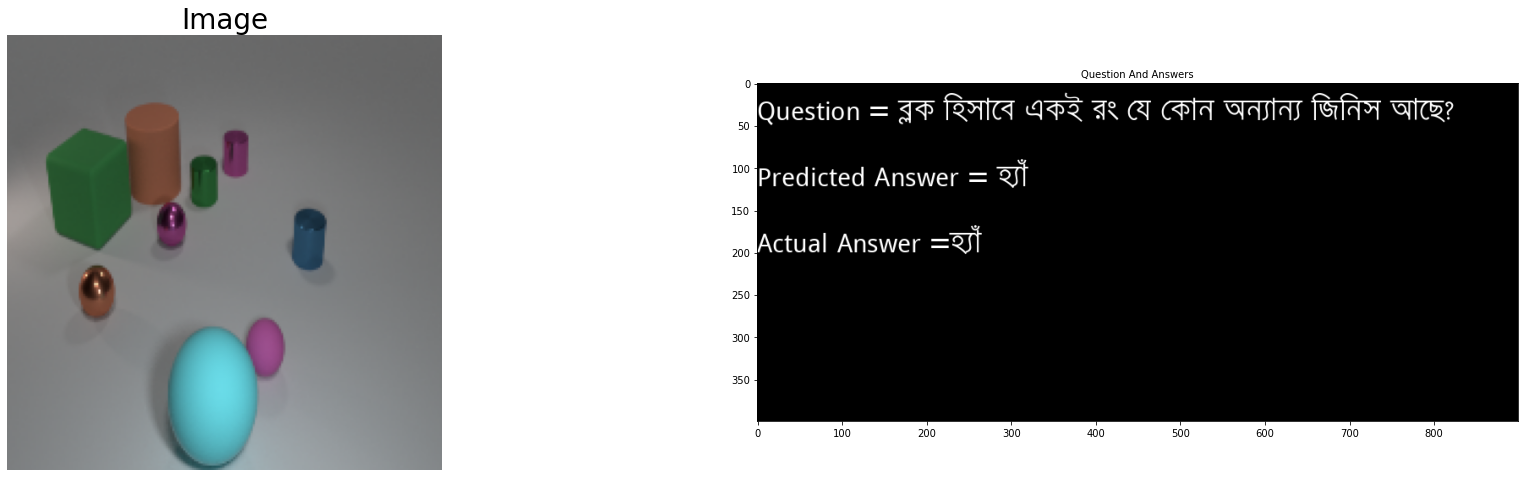

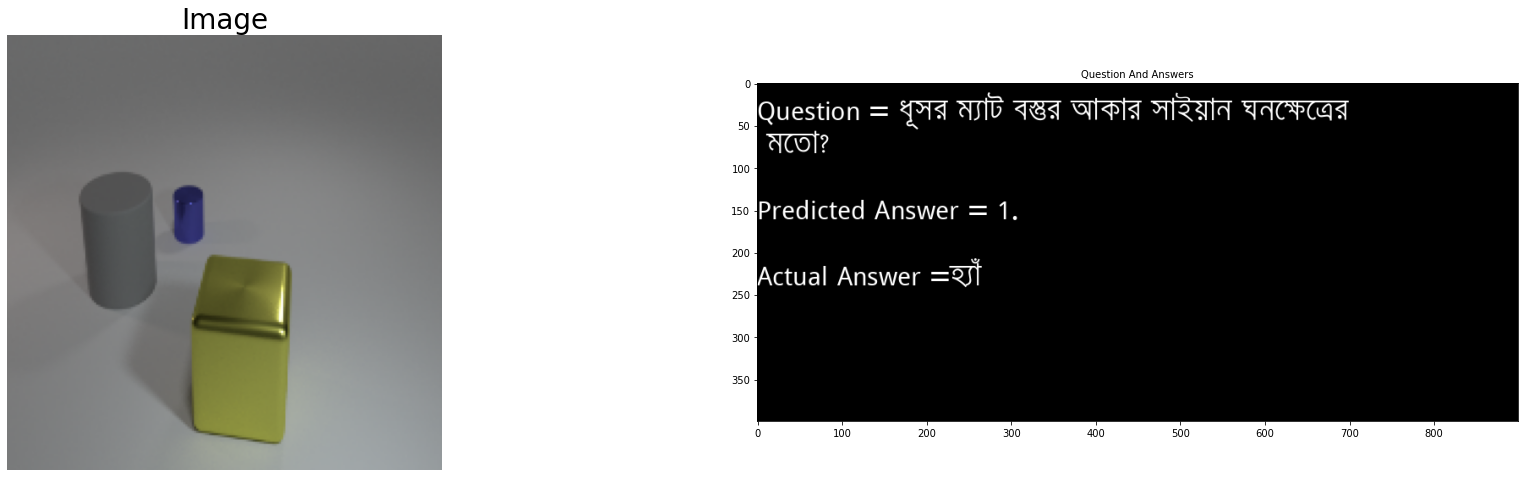

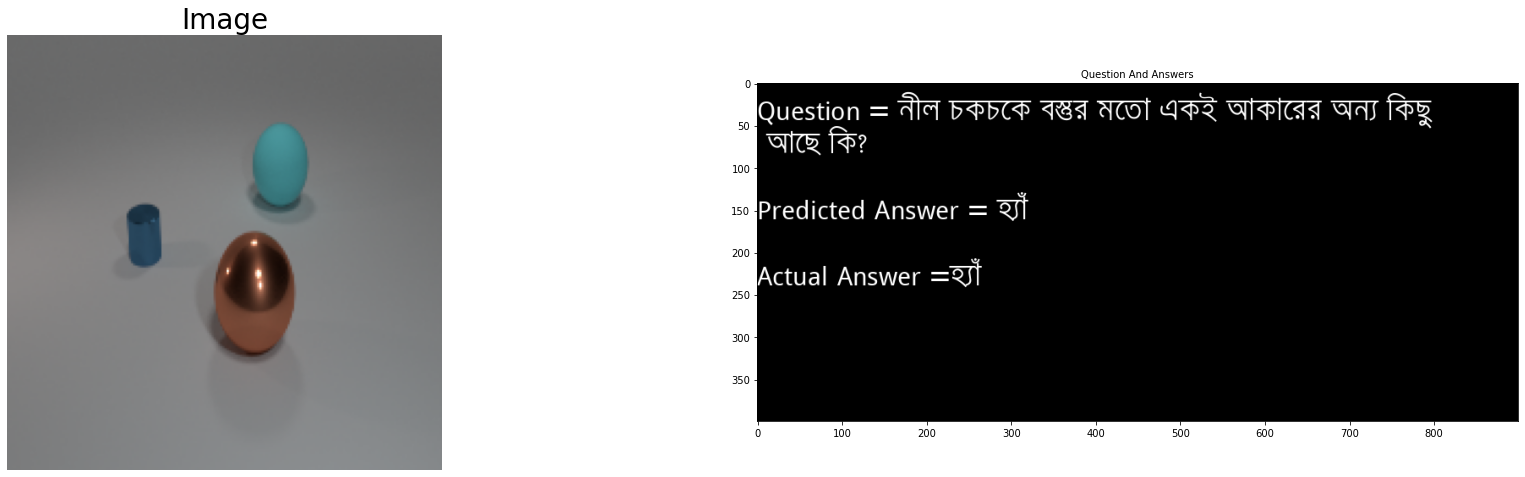

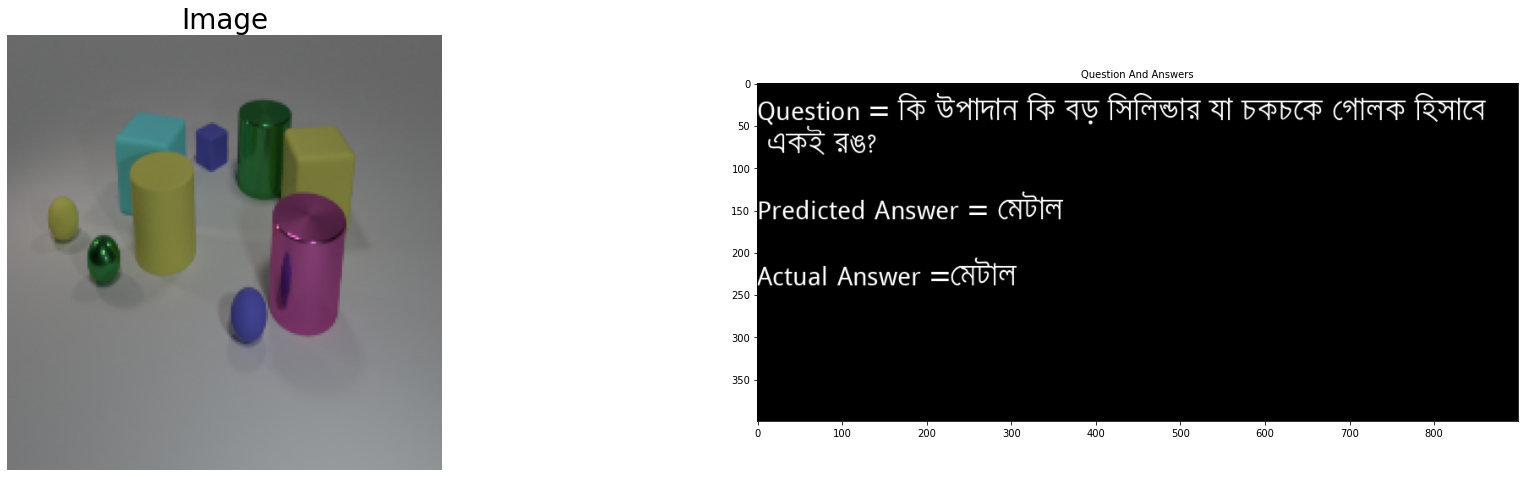

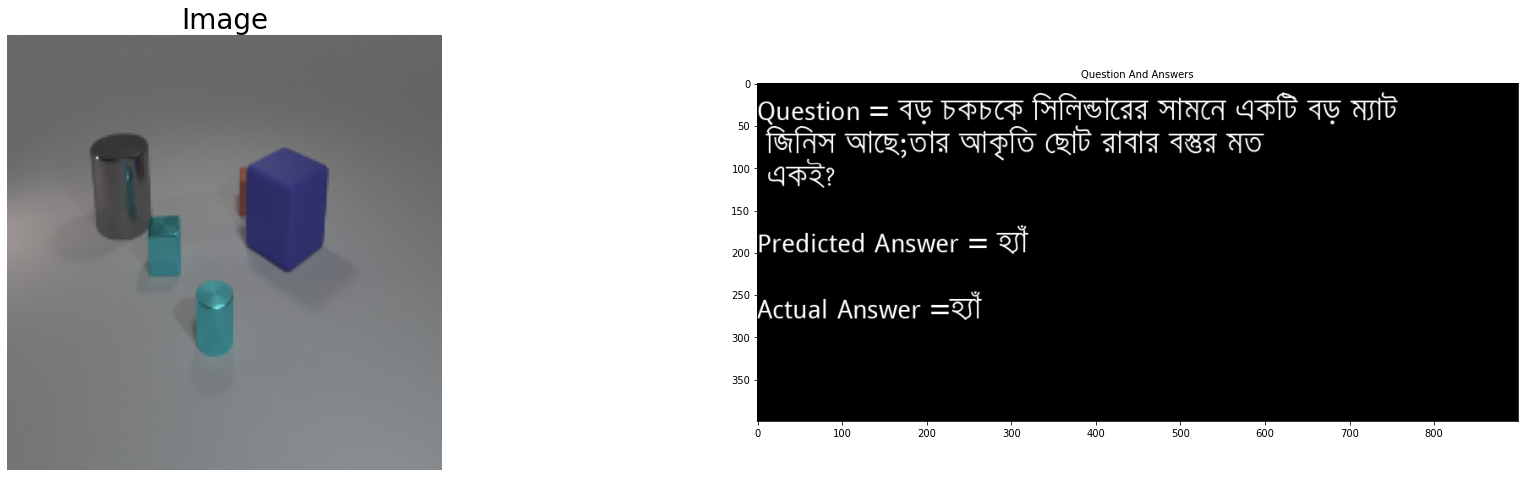

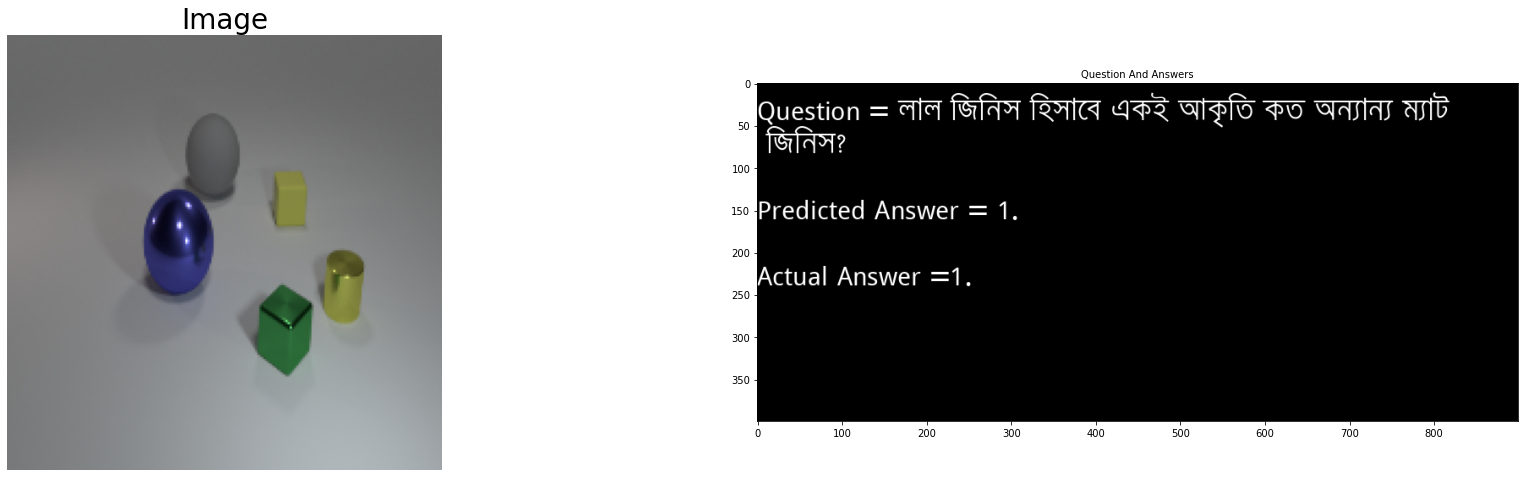

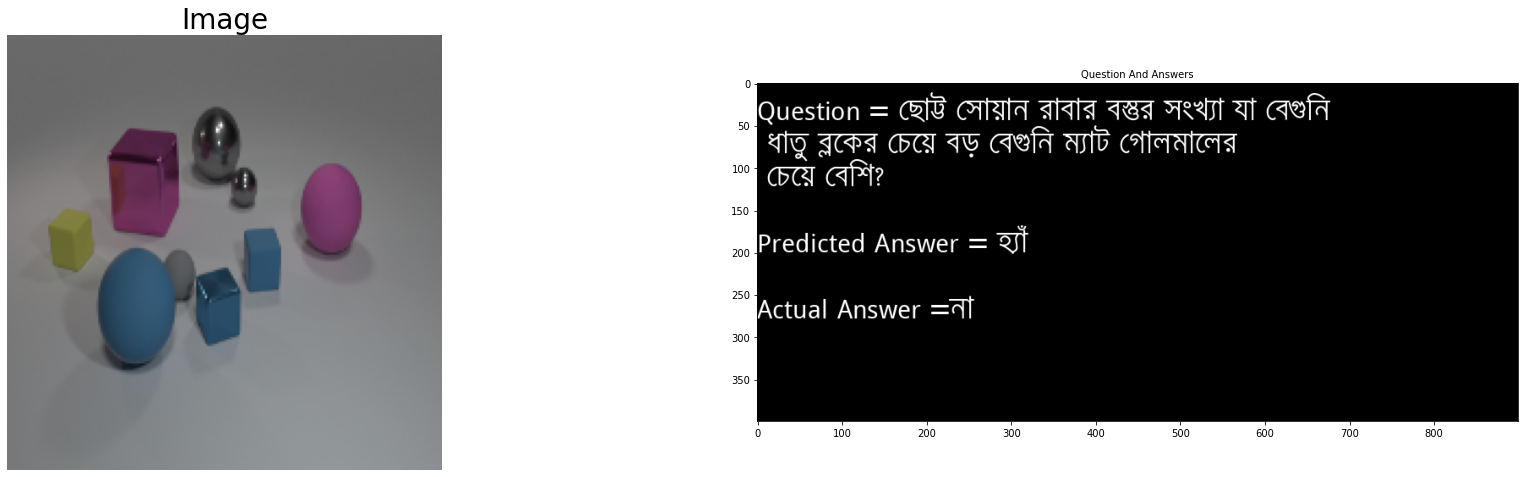

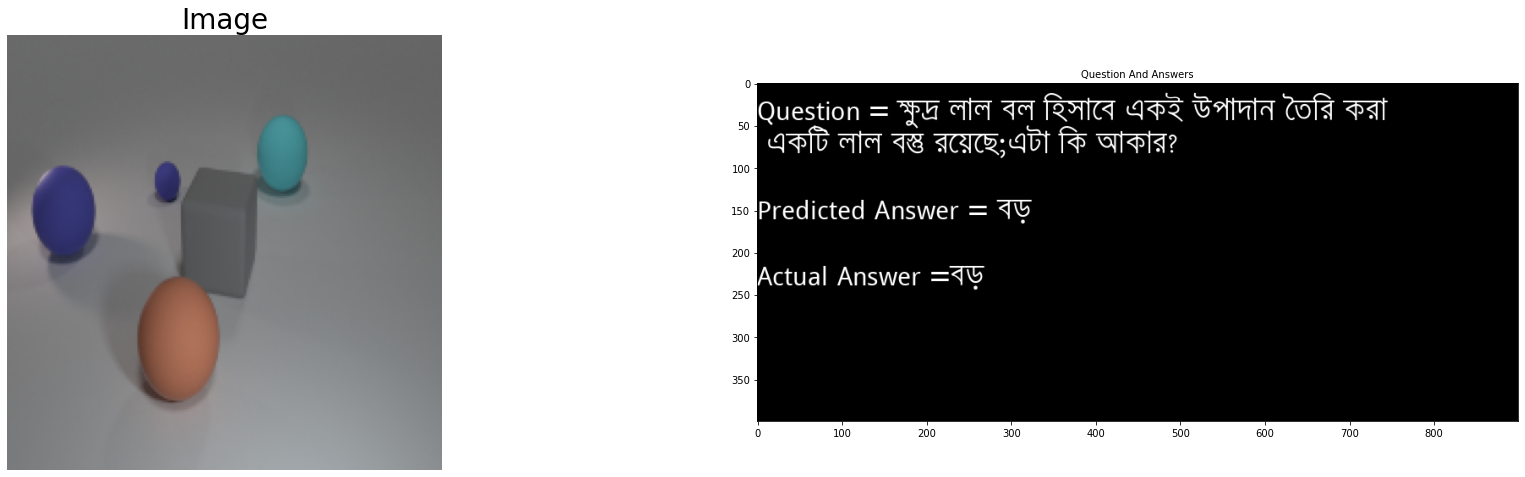

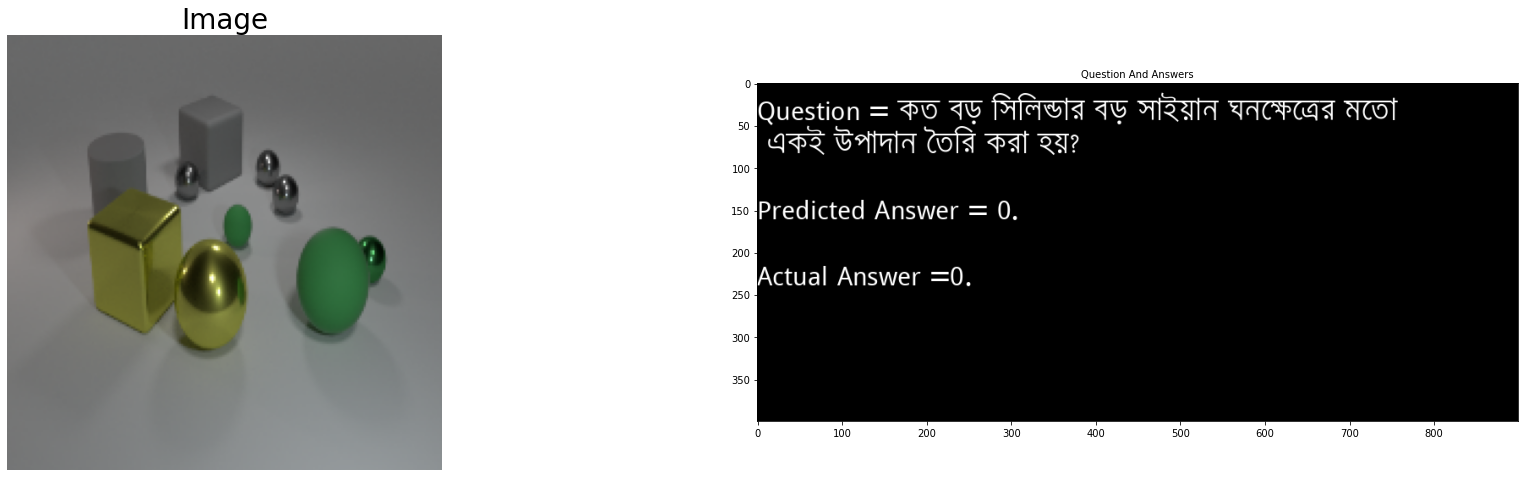

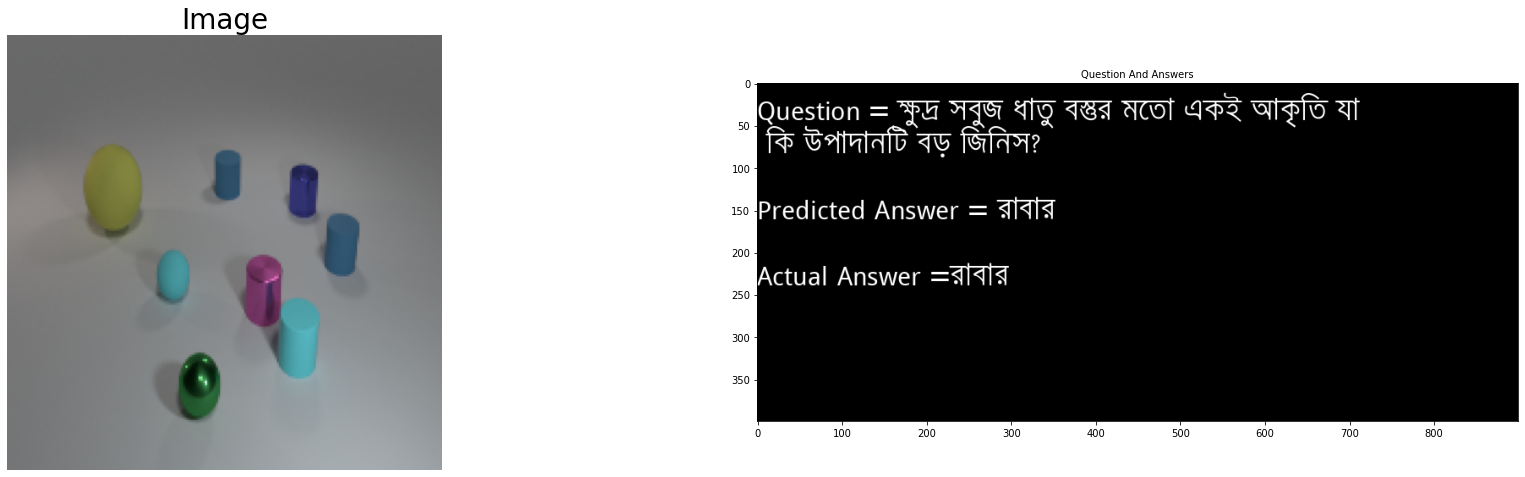

In [137]:

import matplotlib.font_manager as fm
from PIL import Image, ImageFont, ImageDraw

font_bn = ImageFont.truetype("/home/shudip/Downloads/Siyamrupali.ttf",30)
prop = fm.FontProperties(fname='/home/shudip/Downloads/Siyamrupali.ttf')
print("Predictions Are as follows = ")

for i in range(10):
    index=i
    fig,axis=plt.subplots(1,2,figsize=(30, 8))
    im=cv2.imread(val_dataframe.iloc[index]['Path'])
    im=cv2.resize(im,(200,200))
    q=train_dataframe.iloc[index]['Question']
    q=encoder.encode(q)
    paddings = [[0, 150-tf.shape(q)[0]]]
    q=tf.pad(q, paddings, 'CONSTANT', constant_values=0)
    q=np.array(q)
    print(im.shape)
    print(q.shape)
    im.resize(1,200,200,3)
    q.resize(1,150)
    ans=model.predict([[im],[q]])
    question=""
    flag=0
    for i,j in enumerate(train_dataframe.iloc[index]['Question']):
        if (flag==1) and (j==' '):
            question+='\n'
            flag=0
        question+=j
        if (i%40==0)and (i!=0):
            flag=1
    im=cv2.imread(train_dataframe.iloc[index]['Path'])
    im=cv2.resize(im,(200,200))
    im2 = Image.new("RGB",(900, 400))
    draw = ImageDraw.Draw(im2)
    axis[0].imshow(im)
    axis[0].axis('off')
    axis[0].set_title('Image', fontsize=28)
#     axis[1].text(0.05,0.5,
#              "Question = {}\n\nPredicted Answer = {}\n\nActual Answer ={}".format(question,encoder.decode([np.argmax(ans)]),train_dataframe.iloc[index]['Answer']),
#              transform=plt.gca().transAxes,fontsize=19)
    draw.text((0, 10),"Question = {}\n\nPredicted Answer = {}\n\nActual Answer ={}".format(question,encoder.decode([np.argmax(ans)]),train_dataframe.iloc[index]['Answer']),font=font_bn)
    axis[1].imshow(im2)
    axis[1].axis('on')
    axis[1].set_title('Question And Answers', fontsize=10)
    print(question)

 


In [ ]:
print("Predictions Are as follows = ")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
history.history
hist.tail()


References 

Desta, Mikyas T., Larry Chen, e Tomasz Kornuta. “Object-Based Reasoning in VQA”. In 2018 IEEE Winter Conference on Applications of Computer Vision (WACV), 1814–23. Lake Tahoe, NV: IEEE, 2018. https://doi.org/10.1109/WACV.2018.00201.

Hochreiter, S. Hochreiter and J. Schmidhuber. Long short-term memory.
Neural computation, 9(8):1735–1780, 1997

 J. Pennington, R. Socher, and C. Manning.  Global
vectors for word representation. In Proceedings of the 2014
conference on empirical methods in natural language processing (EMNLP), pages 1532–1543, 2014.

Chollet, F. (2017). Deep Learning with Python. New York, NY: Manning Publications.

Keras. (n.d.). Convolutional Layers. Retrieved from https://keras.io/layers/convolutional/

PyTorch. (n.d.). torch.nn.modules.padding. Retrieved from https://pytorch.org/docs/stable/_modules/torch/nn/modules/padding.html

The Blog. -  Convolutions in Autoregressive Neural Networks. Retrieved from https://theblog.github.io/post/convolution-in-autoregressive-neural-networks/

